<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

https://github.com/hhsu15/stockPrediction/blob/master/GA_DS_materials/linear-regression-master/practice/linear_regression-review-lab-starter.ipynb

---

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [2]:
dict_ = { 'X': [1,2,3,4,5,6,7,8,9,10],
          'Y': [.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]   
}
dict_

{'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Y': [0.5, 0.7, 0.8, 0.99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [17]:
pred_df = pd.DataFrame(dict_)
pred_df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [18]:
# A:
new_X = pred_df.X + 10
new_Y = pred_df.Y + 3
new_data = pd.DataFrame(list(zip(new_X,new_Y)), columns=['X', 'Y'])
new_data

,X,Y
0,11,3.50
1,12,3.70
2,13,3.80
3,14,3.99
4,15,4.00
5,16,4.40
6,17,4.80
7,18,5.10
8,19,5.40
9,20,5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [52]:
# A:
df_ = pd.concat([pred_df, new_data], ignore_index=True)
df_

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

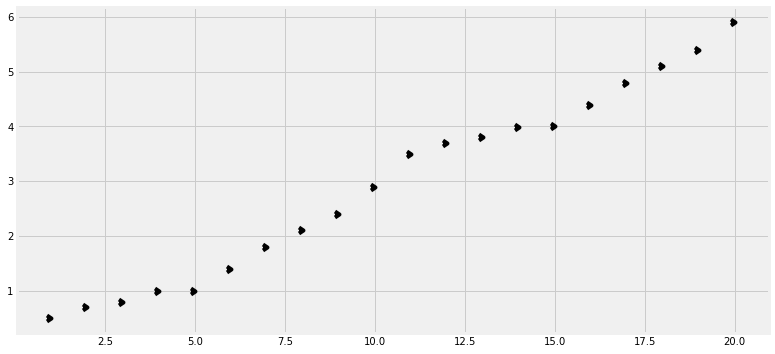

In [53]:
# A:
f,ax = plt.subplots(1,1, figsize=(12,6))
plt.scatter('X', 'Y', data = df_, marker = 5, color=['k'])

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [59]:
# A:

# stattical package
import statsmodels.formula.api as smf
import statsmodels.api as sm
#create fitted model
lm = smf.ols(formula='Y ~ X', data = df_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1271.
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           3.76e-18
Time:                        07:20:11   Log-Likelihood:                 3.9145
No. Observations:                  20   AIC:                            -3.829
Df Residuals:                      18   BIC:                            -1.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0857      0.097     -0.880      0.3

### Drawing Conclusions from OLS for Î²1
- coef = -0.29
- std err = 0.008 (standard effeor of the coefficient)
- t statistic = -35.655 (output from deviding coef by the estimated standard error; assuming that the slope is 0)

## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [60]:
# A:
print("r-squared = ", lm.rsquared)

r-squared =  0.9860390205423032


### What is the p-value for your X?

In [61]:
# A:
print("pvalue = ", lm.pvalues)

pvalue =  Intercept    3.907088e-01
X            3.760659e-18
dtype: float64


### What is the intercept?

In [62]:
# A:
lm.params

Intercept   -0.085684
X            0.289970
dtype: float64

### Using the above, write the equation for our model

In [63]:
# A: "Y ~ X" or "Y = -0.0857 + 0.30X"

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [64]:
# A:
-0.0857 + (0.30 * 20)

5.9143

In [65]:
# A:
-0.0857 + (0.30 * 21)

6.2143

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [69]:
# A:
lm.get_prediction(pd.DataFrame({'X':[20,21]})).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5.713714,0.090378,5.523838,5.903591,5.233938,6.193490
1,6.003684,0.097421,5.799010,6.208359,5.517862,6.489507


### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [75]:
# A: 
y_hat = lm.predict(df_.X)
sum(np.square(y_hat - df_['Y']))

0.7916793984962409

### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

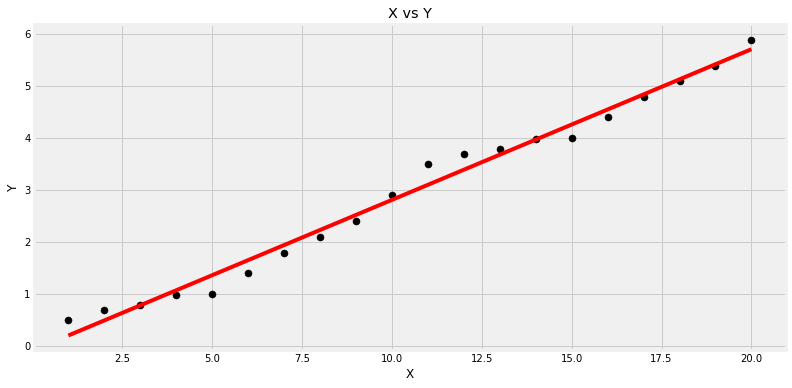

In [79]:
# A:
fig = plt.figure(figsize=(12, 6))

plt.scatter('X','Y', data = df_, color = 'black', s=50)
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(df_.X, y_hat, color='r');

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [ ]:
# A:

In [ ]:
# A:

In [ ]:
# A:

### Using statsmodels as before, fit this new model and save it as poly_results

In [ ]:
# A:

### Print out the model's predictions and save them as poly_yhat

In [ ]:
# A:

### Calculate the SSE

In [ ]:
# A:

### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

In [ ]:
# A:

### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [ ]:
# A:

In [ ]:
# A:

In [ ]:
# A: